Set1 has 3228 elements
Set2 has 3050 elements


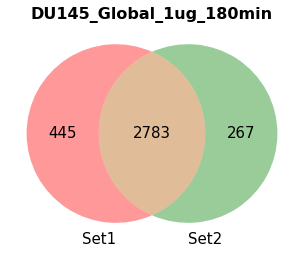

In [4]:
# conda install -c conda-forge matplotlib-venn

import os
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from matplotlib_venn import venn2_unweighted
from time import localtime, strftime


# output 파일 위한 naming: 경로+현재시간
wd = os.getcwd()
tm = localtime()
ntm = strftime('%Y%m%d_%H%M%S', tm)
address = './outputs/venn2'


# N = 2
path1 = './outputs/20220713_DU145_Global_1ug_180min_7-28%_1_proteinGroups_v1.txt'
path2 = './outputs/20220713_DU145_Global_1ug_180min_7-28%_2_proteinGroups_v1.txt'


# set: 집합 선언
df1 = pd.read_table(filepath_or_buffer=path1)
set1 = set(pd.Series(df1["Protein IDs"]))
print('Set1 has '+str(len(set1))+' elements')

df2 = pd.read_table(filepath_or_buffer=path2)
set2 = set(pd.Series(df2["Protein IDs"]))
print('Set2 has '+str(len(set2))+' elements')


# Visualization 1
'''
venn2([set1, set2], ('Set1', 'Set2'))
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
plt.title('Venn2 diagram', fontdict=title_font, loc='center')
plt.savefig(address+'_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')
plt.show()
'''

# Visualization 2
out = venn2_unweighted([set1, set2], ('Set1', 'Set2'))

for text in out.set_labels:
    text.set_fontsize(15)
for x in range(len(out.subset_labels)):
    if out.subset_labels[x] is not None:
        out.subset_labels[x].set_fontsize(15)
    
title_font = {
    'fontsize': 16,
    'fontweight': 'bold'
}
# title: path에서 특정 위치 지정.(outputs 뒤부터~ proteinGroups 앞까지)
plt.title('DU145_Global_1ug_180min', fontdict=title_font, loc='center')
plt.savefig(address+'_unweighted_diagram'+ntm+'.png', dpi=200, facecolor='#ffffff', edgecolor='black')
plt.show()

In [2]:
# 집합에 해당하는 요소들 불러오기!
# N 수가 2 의 경우, 3개의 집합이 존재.
# 집합 연산자 사용!

# inter: intersection (교집합) / differ: difference (차집합)

# (1) 집합 1과 집합 2의 합집합
inter12 = set1 & set2
print('inter12: '+str(len(inter12)))

# (2-1) 집합 1에대한 집합2의 차집합
differ1 = set1 - set2
print('differ1: '+str(len(differ1)))

# (2-2) 집합 2에대한 집합 1의 차집합
differ2 = set2 - set1
print('differ2: '+str(len(differ2)))

inter12: 1129
differ1: 116
differ2: 182


In [4]:
# 각 그룹의 요소들 데이터 프레임으로 만들고 csv로 내보내기.
import os
from time import localtime, strftime


# output 파일 위한 naming: 경로+현재시간
wd = os.getcwd()
tm = localtime()
ntm = strftime('%Y%m%d_%H%M%S', tm)
address = './outputs/venn2_elements-'+ntm+'.txt'


# Merge columns and assembling DataFrame
column_name1 = ['(1AND2)', '(1-2)', '(2-1)']
column_name2 = [inter12, differ1, differ2]
df = pd.DataFrame({'1AND2': list(inter12)})

for i in range (2):
    add = pd.DataFrame({column_name1[i+1]: list(column_name2[i+1])})
    df = pd.concat([df, add], axis=1)
    
print('message! >>> All columns are merged')

# tab 으로 구분된 파일 내보내기
df.to_csv(path_or_buf=address+'_elements'+ntm+'.txt', sep='\t', index=False, encoding='utf-8')
print('message! >>> '+address+'_elements'+ntm+'.txt added.')

df

message! >>> All columns are merged
message! >>> ./outputs/venn2_elements-20220622_171259.txt added.


,1AND2,(1-2),(2-1)
0,P19784,P49189,P35658
1,P17931,Q13451,Q99615
2,P13674,Q9UIW2,Q99614
3,Q12907,P83916,P60891
4,P25788,Q9Y696,Q9UBB9
...,...,...,...
1124,O60313,NaN,NaN
1125,P35249,NaN,NaN
1126,P26006,NaN,NaN
1127,P63000,NaN,NaN


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1169 entries, 0 to 1168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   1AND2AND3  1095 non-null   object
 1   (1AND2)    1129 non-null   object
 2   (1AND3)    1150 non-null   object
 3   (2AND3)    1169 non-null   object
 4   (1AND2)-3  34 non-null     object
 5   (1AND3)-2  55 non-null     object
 6   (2AND3)-1  74 non-null     object
 7   1-(2AND3)  61 non-null     object
 8   2-(1AND3)  108 non-null    object
 9   3-(1AND2)  65 non-null     object
dtypes: object(10)
memory usage: 100.5+ KB
